## DLT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

def dlt(originals, correspondence):  ## numpy arrays of the same size
    traslation = 0
    scale = 0
    
    points_number = np.shape(originals)[0];
    ## o =  orignals
    ## c = correspondence
    o_centroid = np.mean(originals, axis=0)
    c_centroid = np.mean(correspondence, axis=0)
    
    o_centered = originals - np.tile(o_centroid, (points_number,1))
    c_centered = correspondence - np.tile(c_centroid, (points_number,1))
    
    o_norms = np.linalg.norm(o_centered, axis=1)
    c_norms = np.linalg.norm(c_centered, axis=1)                                           
    
    o_distance = np.mean(o_norms)
    c_distance = np.mean(c_norms)
                                          
    o_scale = np.sqrt(2)/o_distance
    c_scale = np.sqrt(2)/c_distance
    
    H_sim_prim = np.array([[c_scale,0      ,-c_centroid[0]*c_scale],
                          [0      ,c_scale,-c_centroid[1]*c_scale],
                          [0      ,0      ,1]])

    
    H_sim = np.array([[o_scale,0      ,-o_centroid[0]*o_scale],
                      [0      ,o_scale,-o_centroid[1]*o_scale],
                      [0      ,0      ,1]])
    
    o_homologous = np.transpose(H_sim @ np.transpose(originals))
    c_homologous = np.transpose(H_sim_prim @ np.transpose(correspondence))

    H_sim_prim = np.linalg.inv(H_sim_prim)
                                             
    A = np.zeros((points_number*2,9))

    zerot = np.array([0,0,0])

    for i in range(0, points_number):
        xt = o_homologous[i, :]
        
        wixt = c_homologous[i,2] * xt
        yixt = c_homologous[i,1] * xt
        xixt = c_homologous[i,0] * xt
        A[2*i,:] = np.concatenate((zerot, -wixt, yixt))
        A[2*i + 1,:] = np.concatenate((wixt, zerot, -xixt))
    (u,d,v) = np.linalg.svd(A)
    H = np.reshape(v[-1, :], (3,3))
    H = np.dot(H, H_sim)
    H = np.dot(H_sim_prim, H)
    return H

In [155]:
matrix = np.array([[1, 2, 1],[3,1, 1],[8, 4, 1],[8,3,1],[7,1,1]])
matrix2 = 2*matrix
matrix2[:,-1] = 1
matrix2

array([[ 2,  4,  1],
       [ 6,  2,  1],
       [16,  8,  1],
       [16,  6,  1],
       [14,  2,  1]])

In [161]:
#matrix = [[1, 2, 1],[3,1, 1],[8, 4, 1],[8,3,1],[7,1,1]]

H = dlt(matrix, matrix2)
print(H)
sol = H @ np.array([1, 2, 1])

[[-2.078 -0.094  1.000]
 [-1.134 -0.567  1.000]
 [ 1.228  0.850  1.000]
 [ 1.228  0.378  1.000]
 [ 0.756 -0.567  1.000]]
[[-2.078 -0.094  1.000]
 [-1.134 -0.567  1.000]
 [ 1.228  0.850  1.000]
 [ 1.228  0.378  1.000]
 [ 0.756 -0.567  1.000]]
[[-1.155 -0.000 -0.000]
 [ 0.000 -1.155  0.000]
 [ 0.000 -0.000 -0.577]]


In [162]:
sol/sol[2]

array([ 2.000,  4.000,  1.000])

In [10]:
np.mean(matrix, axis=0)

array([ 5.400,  2.200,  1.000])

In [14]:
aux = np.mean(matrix, axis=0)
centro = np.tile(aux, (np.shape(matrix)[0],1))
aux = matrix - centro
aux

array([[-4.400, -0.200,  0.000],
       [-2.400, -1.200,  0.000],
       [ 2.600,  1.800,  0.000],
       [ 2.600,  0.800,  0.000],
       [ 1.600, -1.200,  0.000]])

In [13]:
np.linalg.norm(aux, axis=1)

array([ 4.405,  2.683,  3.162,  2.720,  2.000])

In [15]:
np.mean(np.linalg.norm(aux, axis=1))

2.9940792888048526

In [34]:
H

array([[ 1.000,  0.000,  0.000],
       [ 0.000,  0.000,  0.000],
       [ 0.000,  0.000,  0.000]])

In [35]:
xs = [aux[0]/aux[2] for aux in matrix]
ys = [aux[1]/aux[2] for aux in matrix]

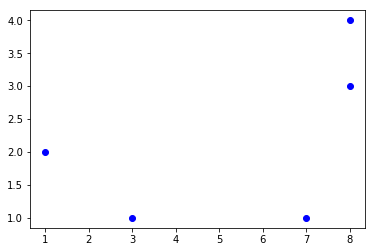

In [36]:
plt.plot(xs, ys, 'bo')